In [2]:
#Cargar la biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Importante para la actividad
import seaborn as sns

In [3]:
#lA FUNCION HEADER ES PARA LEER LOS PRIMEROS DOS RENGLOPNES COMO EL TITULO DE LA COLUMNA
df0 = pd.read_csv('meteo-nogal-09.csv',engine='python')
#pd.options.display.max_rows = 10000
#pd.options.display.max_columns = 100

In [4]:
#RESETEA EL INDICE
df0 = df0.drop(df0.index[0]).reset_index(drop=True)

In [5]:
#Borra las columas que no son necesarias
df0.drop(df0.columns[18:36], axis=1, inplace=True)
df0.drop(df0.columns[2:4], axis=1, inplace=True)

In [6]:
#JUNTAS ESTAS DOS COLUMAS PARA CREAR UNA SOLA COLUMA TIEMPO
df0['FECHA'] = df0['DATE'] + ' ' + df0['TIME']
df0.drop(['DATE', 'TIME'], axis=1 , inplace=True)

In [7]:
df0.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,01-01-09 00:10
1,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,01-01-09 00:20
2,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,01-01-09 00:30
3,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,01-01-09 00:40
4,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,01-01-09 00:50


In [8]:
#CONVERTIR TODAS LAS COLUMAS EN TIPO NUMERIC
df0 = df0.apply(pd.to_numeric, errors='coerce')

In [9]:
#CONVERTIR LA COLUMNA EN TIPO TIEMPO
df0['FECHA'] = df0["FECHA"].astype('datetime64[ns]')

In [10]:
df0.dtypes

u_Avg                 float64
v_Avg                 float64
w_Avg                 float64
t_Avg                 float64
kh20_Avg              float64
net_rad_Avg           float64
shf1_Avg              float64
shf2_Avg              float64
vv_Avg                float64
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
FECHA          datetime64[ns]
dtype: object

In [11]:
df=df0.corr()

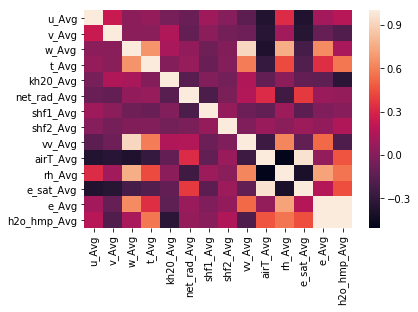

In [12]:
#Mapa de correlaciones con seaborn
sns.heatmap(df)

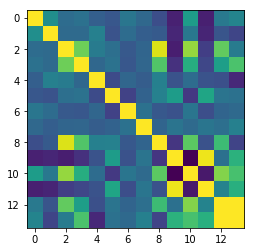

In [13]:
#Mapa de correlaciones con matplotlib
plt.imshow(df)

In [14]:
df

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
u_Avg,1.000000,0.241773,0.028537,0.058863,-0.047981,-0.093187,0.089411,0.003093,-0.138616,-0.363807,0.326205,-0.372100,0.107109,0.173845
v_Avg,0.241773,1.000000,0.016387,0.019921,0.153061,-0.116671,0.029321,-0.053957,-0.075175,-0.341920,0.099303,-0.346782,-0.103330,-0.189840
w_Avg,0.028537,0.016387,1.000000,0.667294,0.121010,0.044286,-0.079466,-0.011563,0.923685,-0.374504,0.760058,-0.222593,0.641772,0.125133
t_Avg,0.058863,0.019921,0.667294,1.000000,-0.002184,0.064174,-0.094414,-0.008491,0.593997,-0.288852,0.433942,-0.183273,0.340214,0.576896
kh20_Avg,-0.047981,0.153061,0.121010,-0.002184,1.000000,-0.157635,-0.005268,-0.058466,0.149991,-0.116329,0.031765,-0.119534,-0.134477,-0.326760
net_rad_Avg,-0.093187,-0.116671,0.044286,0.064174,-0.157635,1.000000,-0.206065,-0.027180,0.156017,0.326684,-0.254705,0.381454,0.076382,0.056376
shf1_Avg,0.089411,0.029321,-0.079466,-0.094414,-0.005268,-0.206065,1.000000,0.059003,-0.089608,-0.121637,0.084782,-0.138901,-0.016448,0.014207
shf2_Avg,0.003093,-0.053957,-0.011563,-0.008491,-0.058466,-0.027180,0.059003,1.000000,-0.017869,0.077130,0.014974,0.081516,0.048861,0.151206
vv_Avg,-0.138616,-0.075175,0.923685,0.593997,0.149991,0.156017,-0.089608,-0.017869,1.000000,-0.264771,0.624201,-0.125826,0.525220,-0.193064
airT_Avg,-0.363807,-0.341920,-0.374504,-0.288852,-0.116329,0.326684,-0.121637,0.077130,-0.264771,1.000000,-0.501728,0.963527,0.050730,0.464621


Text(0.5, 1.0, 't_Avg vs w_Avg, Correlación=0.667294')

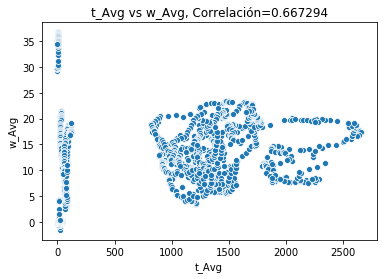

In [15]:
sns.scatterplot(x=df0["t_Avg"], y= df0["w_Avg"])
plt.title("t_Avg vs w_Avg, Correlación=0.667294")

Text(0.5, 1.0, 'vv_Avg vs w_Avg, Correlación=0.923685')

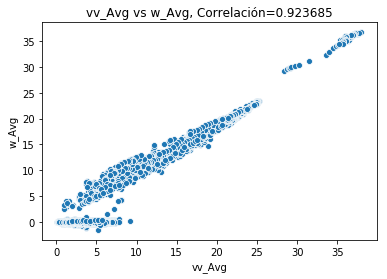

In [16]:
sns.scatterplot(x = df0["vv_Avg"], y = df0["w_Avg"])
plt.title("vv_Avg vs w_Avg, Correlación=0.923685")

Text(0.5, 1.0, 'rh_ Avg vs w_Avg, Correlación = 0.760058')

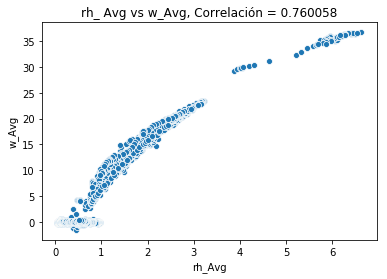

In [17]:
sns.scatterplot(x = df0["rh_Avg"], y = df0["w_Avg"])
plt.title("rh_ Avg vs w_Avg, Correlación = 0.760058")

Text(0.5, 1.0, 'e_Avg vs w_Avg, Correlación = 0.641772')

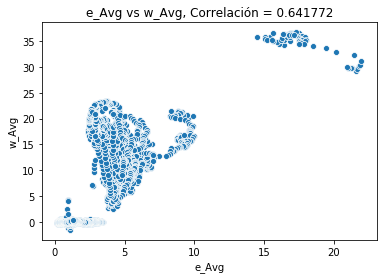

In [18]:
sns.scatterplot(x = df0["e_Avg"], y = df0["w_Avg"])
plt.title("e_Avg vs w_Avg, Correlación = 0.641772")

Text(0.5, 1.0, 't_Avg vs vv_Avg, Correlación = 0.593997')

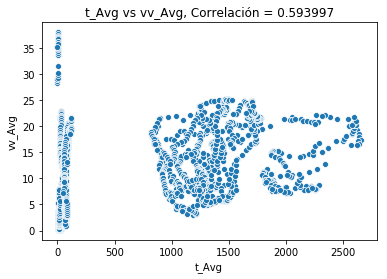

In [19]:
sns.scatterplot(x = df0["t_Avg"], y = df0["vv_Avg"])
plt.title("t_Avg vs vv_Avg, Correlación = 0.593997")

Text(0.5, 1.0, 't_Avg vs h2o_hmp_Avg, Correlación = 0.576896')

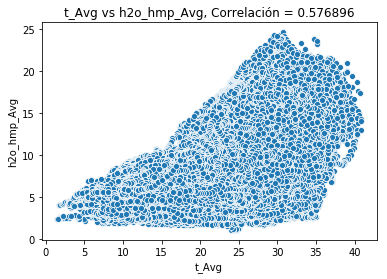

In [20]:
sns.scatterplot(x = df0["t_Avg"], y = df0["h2o_hmp_Avg"])
plt.title("t_Avg vs h2o_hmp_Avg, Correlación = 0.576896")

Text(0.5, 1.0, 'rh_Avg vs vv_Avg, Correlación = 0.624201')

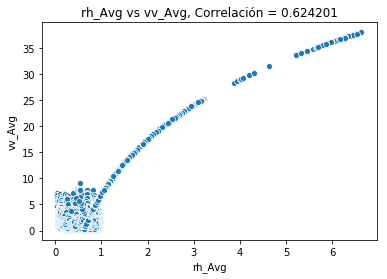

In [21]:
sns.scatterplot(x = df0["rh_Avg"], y = df0["vv_Avg"])
plt.title("rh_Avg vs vv_Avg, Correlación = 0.624201")

Text(0.5, 1.0, 'e_Avg vs vv_Avg, Correlación =  0.525200')

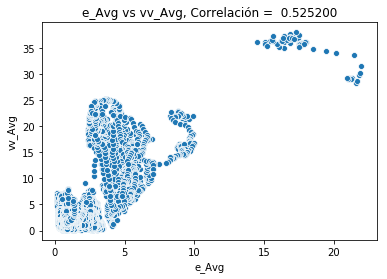

In [22]:
sns.scatterplot(x = df0["e_Avg"], y = df0["vv_Avg"])
plt.title("e_Avg vs vv_Avg, Correlación =  0.525200")

Text(0.5, 1.0, 'rh_Avg vs airT_Avg, Correlación = -0.501728')

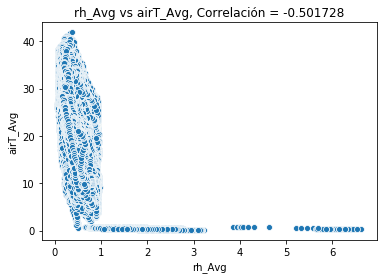

In [23]:
sns.scatterplot(x = df0["rh_Avg"], y = df0["airT_Avg"])
plt.title("rh_Avg vs airT_Avg, Correlación = -0.501728")

Text(0.5, 1.0, 'e_sat_Avg vs airT_Avg, Correlación = 0.963527')

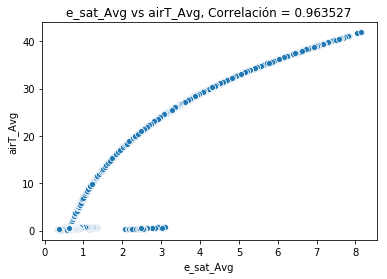

In [24]:
sns.scatterplot(x = df0["e_sat_Avg"], y = df0["airT_Avg"])
plt.title("e_sat_Avg vs airT_Avg, Correlación = 0.963527")

Text(0.5, 1.0, 'e_Avg vs rh_Avg, Correlación = 0.722503')

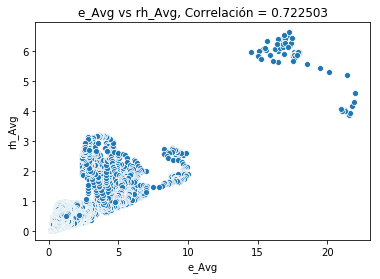

In [25]:
sns.scatterplot(x = df0["e_Avg"], y = df0["rh_Avg"])
plt.title("e_Avg vs rh_Avg, Correlación = 0.722503")

Text(0.5, 1.0, 'h2o_hmp_Avg vs rh_Avg, Correlación = 0.0563712')

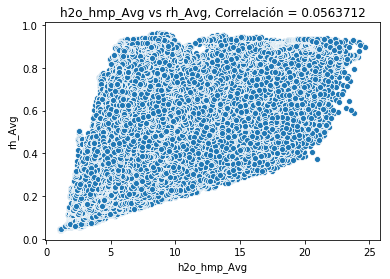

In [26]:
sns.scatterplot(x = df0["h2o_hmp_Avg"], y = df0["rh_Avg"])
plt.title("h2o_hmp_Avg vs rh_Avg, Correlación = 0.563712")

Text(0.5, 1.0, 'e_sat_Avg vs airT_Avg, Correlación = 0.0.963527')

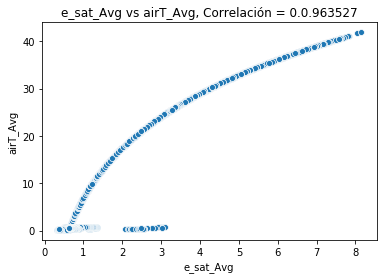

In [27]:
sns.scatterplot(x = df0["e_sat_Avg"], y = df0["airT_Avg"])
plt.title("e_sat_Avg vs airT_Avg, Correlación = 0.0.963527")

Text(0.5, 1.0, 'h2o_hmp_Avg vs e_Avg, Correlación = 0.999154')

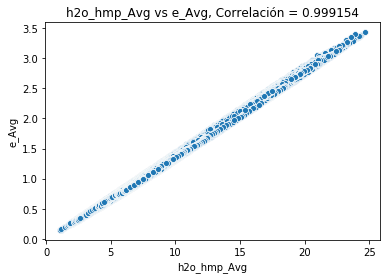

In [28]:
sns.scatterplot(x = df0["h2o_hmp_Avg"], y = df0["e_Avg"])
plt.title("h2o_hmp_Avg vs e_Avg, Correlación = 0.999154")